In [1]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
# Add the path to the utils folder to sys.path
utils_path = Path('../python').resolve()
sys.path.append(str(utils_path))


import rasterio
import numpy as np
from pathlib import Path
from process_utils import (preprocess_data,
                           superpixel_segmentation)
from rio_utils import (reproject_arr_to_match_profile)

In [2]:
# === Load Alpha-1 Image ===
def open_one(path):
    with rasterio.open(path) as ds:
        band = ds.read(1)  # Read the first band
        profile = ds.profile
    return band, profile

In [3]:
tifs = [
    Path("/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Pre_alpha_perimeter_data/pre_merged_alpha_image_test.tif"),
    Path("/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Post_alpha_perimeter_data/post_merged_alpha_image_test.tif"),
    # Path("/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Slope/cropped_slope_test.tif")
]
tifs

[PosixPath('/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Pre_alpha_perimeter_data/pre_merged_alpha_image_test.tif'),
 PosixPath('/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Post_alpha_perimeter_data/post_merged_alpha_image_test.tif')]

In [4]:
# Open both images
bands, profiles = zip(*map(open_one, tifs))
alpha_pre = bands[0]
alpha_post = bands[1]
profile_pre = profiles[0]
profile_post = profiles[1]

Preprocess the image
Applies interpolation, clipping, total-variation denoising, and background mask

Parameters

interpolation (bool): whether or not to perform nearest neighbor interpolation for the preprocessing
weight (float): denoising weight. The greater the weight, the more denoising (at the expense of fidelity to image).

In [5]:
interpolation = True
weight = 5

In [6]:
# === Step 3: Preprocess (Interpolation, Denoising) ===
alpha_pre = preprocess_data(alpha_pre, interpolation, weight)
alpha_post = preprocess_data(alpha_post, interpolation, weight)
print("Preprocessing done")

Preprocessing done


In [ ]:
# # Open both images
# bands, profiles = zip(*map(open_one, tifs))
# alpha_pre = bands[0]
# slope = bands[1]
# profile_pre = profiles[0]
# profile_slope = profiles[1]

In [7]:
# === Step 4: Reproject post image to match pre ===
alpha_post, _ = reproject_arr_to_match_profile(
    alpha_post, profile_post, profile_pre, resampling='bilinear')
alpha_post = alpha_post[0]  # Get back to 2D
print("Reprojection done")

Reprojection done


In [ ]:
# # === Step 5: Reproject slope image to match pre ===
# slope, _ = reproject_arr_to_match_profile(
#     slope, profile_slope, profile_pre, resampling='bilinear')
# slope = slope[0]  # Get back to 2D
# print("Reprojection done")

In [8]:
print("pre_alpha1", alpha_pre.shape)

pre_alpha1 (4921, 6093)


In [9]:
print("pre_alpha1", alpha_post.shape)

pre_alpha1 (4921, 6093)


In [10]:
# print("slope", slope.shape)

In [11]:
# === Save Postfire alpha1 ===
post_alpha1_out_path = "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Post_alpha_perimeter_data/post_merged_alpha_image_test_aligned.npy"
np.save(post_alpha1_out_path, alpha_post)

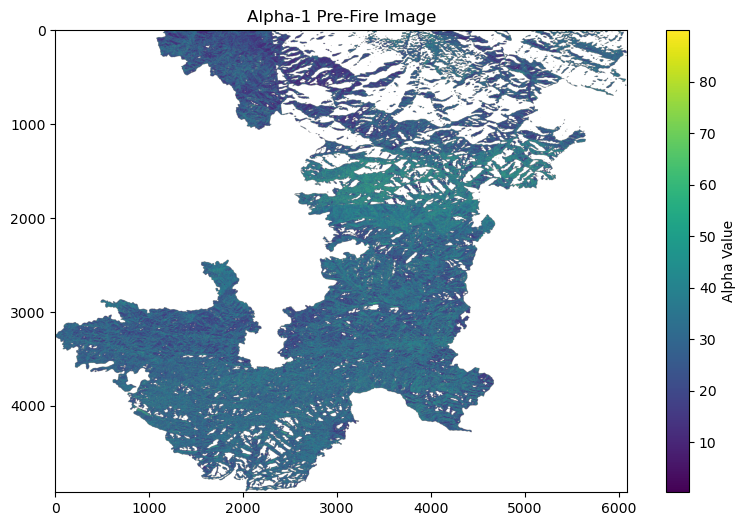

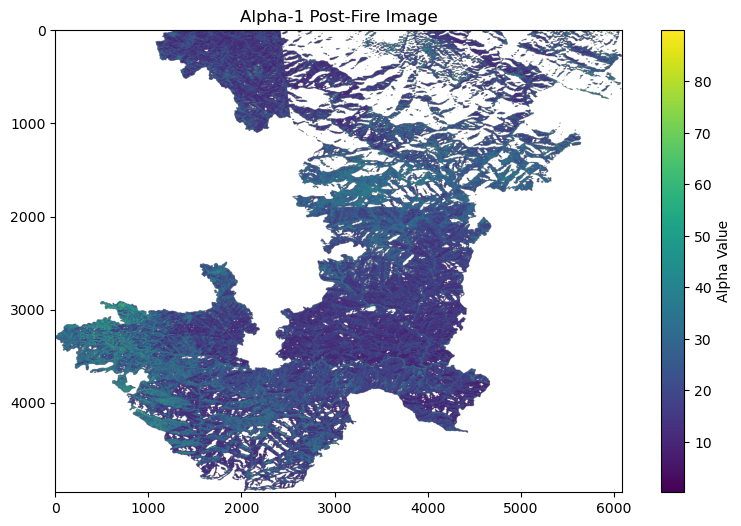

In [12]:
# Load the images
alpha_pre, profile_pre = open_one(tifs[0])
alpha_post, profile_post = open_one(tifs[1])

# Display function
def show_alpha_image(data, title):
    plt.figure(figsize=(10, 6))
    plt.imshow(data)
    plt.colorbar(label="Alpha Value")
    plt.title(title)
    # plt.axis("off")
    plt.show()

# Show the images
show_alpha_image(alpha_pre, "Alpha-1 Pre-Fire Image")
show_alpha_image(alpha_post, "Alpha-1 Post-Fire Image")

In [ ]:
# # === Save slope ===
# slope_out_path = "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Slope/slope_aligned.npy"
# np.save(slope_out_path, slope)

In [ ]:
# # Save the reprojected post-alpha image
# with rasterio.open("/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Post_alpha_perimeter_data/post_merged_alpha_image_test_aligned.tif", "w", **profile_post_aligned) as dst:
#     dst.write(alpha_post, 1)  # write to band 1

# print("Reprojected post-alpha image saved successfully!")


In [ ]:
print("pre_alpha1", alpha_pre.shape)

In [ ]:
print("pre_alpha1", alpha_post.shape)

In [ ]:
# import rasterio
# import numpy as np
# from pathlib import Path

# # === Load Alpha-1 Image ===
# def open_one(path):
#     with rasterio.open(path) as ds:
#         band = ds.read(1)  # Read the first band
#         profile = ds.profile
#     return band, profile

# # Paths to pre- and post-fire Alpha-1 images
# tifs = [
#     Path("/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Pre_alpha_perimeter_data/pre_merged_alpha_image_test.tif"),
#     Path("/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Post_alpha_perimeter_data/post_merged_alpha_image_test.tif"),
#     Path("/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Pre_alpha_data/SanAnd_08525_18076_003_181011_alpha1.tif")
# ]

# # Load and process each image
# for idx, tif_path in enumerate(tifs):
#     print(f"\n=== Image {idx+1}: {tif_path.name} ===")
#     data, profile = open_one(tif_path)

#     # # Convert from cos(alpha) to degrees
#     # degrees = np.degrees(np.arccos(data))
#     # degrees = np.clip(degrees, 0, 99)  # Clip values for visualization or error handling

#     # Top-left 5x5 pixels
#     print("Top-left 5x5 pixel values (degrees):")
#     print(data[:5, :5])

#     # Stats
#     valid = data[~np.isnan(data)]
#     print("Statistics (data):")
#     print(" - Min:", np.min(valid))
#     print(" - Max:", np.max(valid))
#     print(" - Mean:", np.mean(valid))
#     print(" - Shape:", data.shape)

#     # Unique pixel values (optional: rounded to 2 decimals)
#     unique_vals = np.unique(np.round(valid, 2))
#     print("Unique values (non-NaN, rounded to 2 decimals):")
#     print(unique_vals[:50])  # Show first 50 for brevity


In [ ]:
# import numpy as np

# pre = np.array([0.000, 0.010, 0.020, 3.260, 5.260, 7.300, 10.690, 11.610, 12.500, 13.300, 13.540,
#                 16.740, 17.360, 18.910, 20.180, 20.530, 21.490, 22.540, 22.560, 23.440, 26.210,
#                 26.880, 27.330, 27.340, 27.870, 27.990, 28.210, 28.270, 29.290, 29.370, 30.130,
#                 30.460, 30.730, 31.930, 32.240, 32.910, 33.110, 33.480, 33.860, 33.890, 34.230,
#                 35.250, 35.370, 35.480, 37.040, 38.200, 39.930, 40.090, 40.100, 41.480])

# post = np.array([0.000, 0.010, 0.020, 2.720, 2.780, 3.890, 4.540, 4.660, 4.950, 5.940, 6.590,
#                  6.900, 7.510, 7.590, 7.630, 7.720, 8.190, 8.900, 9.040, 9.420, 9.790, 9.800,
#                  9.820, 11.290, 11.380, 11.510, 11.720, 11.760, 11.900, 11.910, 12.380, 12.420,
#                  13.120, 13.180, 13.550, 14.190, 14.240, 14.520, 14.800, 14.920, 14.990, 15.070,
#                  15.130, 15.270, 15.2a80, 15.760, 15.810, 15.860, 15.890, 15.930])

# diff = []

# for val in pre:
#     closest_post = post[np.argmin(np.abs(post - val))]
#     diff.append(val - closest_post)

# diff = np.array(diff)

# print("Differences (pre - closest post):")
# print(np.round(diff, 3))


In [ ]:
# import rasterio
# import numpy as np
# from pathlib import Path

# # === Function to Load and Convert Alpha to Degrees ===
# def open_and_convert_to_degrees(path):
#     with rasterio.open(path) as ds:
#         band = ds.read(1)
#     degrees = np.degrees(np.arccos(band))
#     degrees = np.clip(degrees, 0, 99)
#     return degrees

# # === File Paths ===
# tif_pre = Path("/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Pre_alpha_perimeter_data/pre_merged_alpha_image_test.tif")
# tif_post = Path("/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Post_alpha_perimeter_data/post_merged_alpha_image_test.tif")

# # === Load and Convert to Degrees ===
# alpha_pre = open_and_convert_to_degrees(tif_pre)
# alpha_post = open_and_convert_to_degrees(tif_post)

# # === Crop to Common Shape ===
# min_rows = min(alpha_pre.shape[0], alpha_post.shape[0])
# min_cols = min(alpha_pre.shape[1], alpha_post.shape[1])
# alpha_pre = alpha_pre[:min_rows, :min_cols]
# alpha_post = alpha_post[:min_rows, :min_cols]

# # === Print Unique Values (Rounded) ===
# valid_pre = alpha_pre[~np.isnan(alpha_pre)]
# valid_post = alpha_post[~np.isnan(alpha_post)]

# unique_pre = np.unique(np.round(valid_pre, 2))
# unique_post = np.unique(np.round(valid_post, 2))

# print("=== Unique Pixel Values (Degrees) ===")
# print("\nPre-Fire Image (first 50):")
# print(unique_pre[:50])

# print("\nPost-Fire Image (first 50):")
# print(unique_post[:50])


In [ ]:
# import rasterio
# import numpy as np
# from pathlib import Path

# # === Function to Load and Convert Alpha to Degrees ===
# def open_and_convert_to_degrees(path):
#     with rasterio.open(path) as ds:
#         band = ds.read(1)
#     degrees = np.degrees(np.arccos(band))
#     degrees = np.clip(degrees, 0, 99)  # Clip for safety
#     return degrees

# # === File Paths ===
# tif_pre = Path("/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Pre_alpha_perimeter_data/pre_merged_alpha_image_test.tif")
# tif_post = Path("/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Post_alpha_perimeter_data/post_merged_alpha_image_test.tif")

# # === Load and Convert to Degrees ===
# alpha_pre = open_and_convert_to_degrees(tif_pre)
# alpha_post = open_and_convert_to_degrees(tif_post)

# # === Crop to Common Shape ===
# min_rows = min(alpha_pre.shape[0], alpha_post.shape[0])
# min_cols = min(alpha_pre.shape[1], alpha_post.shape[1])
# alpha_pre_cropped = alpha_pre[:min_rows, :min_cols]
# alpha_post_cropped = alpha_post[:min_rows, :min_cols]
# # === Print Unique Values (Rounded) ===
# valid_pre = alpha_pre[~np.isnan(alpha_pre)]
# valid_post = alpha_post[~np.isnan(alpha_post)]

# unique_pre = np.unique(np.round(valid_pre, 2))
# unique_post = np.unique(np.round(valid_post, 2))

# print("=== Unique Pixel Values (Degrees) ===")
# print("\nPre-Fire Image (first 50):")
# print(unique_pre[:50])

# print("\nPost-Fire Image (first 50):")
# print(unique_post[:50])
# # === Compute ΔAlpha ===
# delta_alpha = alpha_pre_cropped - alpha_post_cropped

# # === Mask and Analyze Valid Pixels ===
# valid_mask = ~np.isnan(alpha_pre_cropped) & ~np.isnan(alpha_post_cropped)
# delta_valid = delta_alpha[valid_mask]

# # === Output ===
# print("\n=== ΔAlpha (Pre - Post) in degrees ===")
# print("Top-left 5x5 pixel values:")
# print(delta_alpha[:5, :5])

# print("\nStatistics:")
# print(" - Min:", np.min(delta_valid))
# print(" - Max:", np.max(delta_valid))
# print(" - Mean:", np.mean(delta_valid))
# print(" - Shape:", delta_alpha.shape)

# # Unique delta values (rounded for readability)
# unique_vals = np.unique(np.round(delta_valid, 2))
# print("\nUnique ΔAlpha values (rounded to 2 decimals):")
# print(unique_vals[:50])  # Show first 50


In [ ]:


# # === Create DataFrame for Boxplot ===
# mask = ~np.isnan(alpha_pre) & ~np.isnan(alpha_post)
# df = pd.DataFrame({
#     "Pre-fire Alpha-1": alpha_pre[mask],
#     "Post-fire Alpha-1": alpha_post[mask]
# })

# # Melt to long format for seaborn
# df_melted = df.melt(var_name="Time", value_name="Alpha 1 Angle (degrees)")

# # === Plot ===
# sns.set(style="whitegrid")
# plt.figure(figsize=(8, 6))
# sns.boxplot(data=df_melted, x="Time", y="Alpha 1 Angle (degrees)", palette="Set2", showfliers=True)
# plt.title("Alpha-1 Angle Before and After Fire")
# plt.tight_layout()
# plt.show()


In [ ]:
# import rasterio
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from pathlib import Path
# # === Filter Valid Pixels ===
# mask = ~np.isnan(alpha_pre) & ~np.isnan(alpha_post)

# # === Prepare DataFrame for Boxplot ===
# df = pd.DataFrame({
#     "Pre-fire": alpha_pre[mask],
#     "Post-fire": alpha_post[mask],
#     "Delta (Pre - Post)": alpha_pre[mask] - alpha_post[mask]
# })
# df_melted = df.melt(var_name="Time", value_name="Alpha 1 Angle (degrees)")

# # === Plot with Custom Colors ===
# sns.set(style="whitegrid", font_scale=1.1)
# plt.figure(figsize=(9, 6))

# # Custom colors
# palette = {
#     "Pre-fire": "#66c2a5",        # Greenish
#     "Post-fire": "#fc8d62",       # Reddish
#     "Delta (Pre - Post)": "#8da0cb"  # Bluish
# }

# sns.boxplot(
#     data=df_melted,
#     x="Time",
#     y="Alpha 1 Angle (degrees)",
#     palette=palette,
#     showfliers=True,
#     linewidth=1.2
# )

# plt.title("Alpha-1 Angle Distribution Before and After Fire", fontsize=14)
# plt.ylabel("Alpha 1 Angle (degrees)")
# plt.xlabel("")
# plt.tight_layout()
# plt.show()

In [ ]:
np.set_printoptions(threshold=np.inf, linewidth=np.inf)  # Show all values without truncation
print(alpha_degrees)
np.savetxt("/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Delta_alpha_data/alpha_degrees_full.txt", alpha_degrees, fmt="%.2f", delimiter=",")
print("Full alpha degrees array saved to 'alpha_degrees_full.txt'")


In [ ]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

def open_one(path):
    with rasterio.open(path) as ds:
        band = ds.read(1)
        profile = ds.profile
    return band, profile

# Load image
alpha_band, profile = open_one(tifs[0])

# Convert from cos(alpha) to degrees
alpha_degrees = np.degrees(np.arccos(alpha_band))

# Clip to 0–99 degrees if needed
alpha_degrees = np.clip(alpha_degrees, 0, 99)

# Plot
plt.imshow(alpha_degrees)
plt.colorbar(label="Alpha Angle (degrees)")
plt.title("Alpha-1 Pre-Fire Image (Degrees)")

plt.show()


In [ ]:


def open_one(path):
    with rasterio.open(path) as ds:
        band = ds.read(1)
        profile = ds.profile
    return band, profile

# Load alpha image (cosine values)
alpha_cos, profile = open_one(tifs[0])
alpha_cos, profile = open_one(tifs[1])
# Handle invalid values (e.g., nan or outside expected range)
alpha_cos = np.clip(alpha_cos, 0, 1)

# Convert to degrees
alpha_deg = np.degrees(np.arccos(alpha_cos))

# Plot
plt.figure(figsize=(10, 8))
im = plt.imshow(alpha_deg)
plt.colorbar(im, label="Alpha-1 Angle (Degrees)")
plt.title("Alpha-1 Pre-Fire Image (Dominant Scattering Angle)")
plt.title("Alpha-1 Pre-Fire Image (Dominant Scattering Angle)")
plt.axis('off')
plt.show()


In [ ]:
import rasterio
import numpy as np

# Function to open the raster
def open_one(path):
    with rasterio.open(path) as ds:
        band = ds.read(1)  # Read the first band (as a 2D NumPy array)
        profile = ds.profile
    return band, profile

# Load the raster
alpha_band, profile = open_one(tifs[0])

# === Print Options ===

# 1. Print full array (be careful – can be large!)
print("All pixel values:")
print(alpha_band)

# 2. Print a small sample (e.g., top-left 5x5 block)
print("\nTop-left 5x5 pixel values:")
print(alpha_band[:5, :5])

# 3. Print stats
print("\nStatistics:")
print(f"Min: {np.min(alpha_band)}")
print(f"Max: {np.max(alpha_band)}")
print(f"Mean: {np.mean(alpha_band)}")
print(f"Shape: {alpha_band.shape}")


In [ ]:
with rasterio.open(tifs[0]) as ds:
    print("Profile:", ds.profile)
    print("Dtype:", ds.dtypes)
    print("Nodata Value:", ds.nodata)

    band = ds.read(1, masked=False)  # Try without masking nodata
    print("Unique values:", np.unique(band[~np.isnan(band)]))  # Ignore NaNs


In [ ]:
# Load the images
alpha_pre, profile_pre = open_one(tifs[0])
alpha_post, profile_post = open_one(tifs[1])

In [ ]:
# print(alpha_pre)

In [ ]:
# plt.imshow(alpha_pre)
# print(alpha_pre[4000][3000])
# print(alpha_post[4000][3000])


In [ ]:
# # Load the images
# alpha_pre, profile_pre = open_one(tifs[0])
# alpha_post, profile_post = open_one(tifs[1])

# # Display function
# def show_alpha_image(data, title):
#     plt.figure(figsize=(10, 6))
#     plt.imshow(data)
#     plt.colorbar(label="Alpha Value")
#     plt.title(title)
#     plt.axis("off")
#     plt.show()

# # Show the images
# show_alpha_image(alpha_pre, "Alpha-1 Pre-Fire Image")
# show_alpha_image(alpha_post, "Alpha-1 Post-Fire Image")

In [ ]:
# Open both images
bands, profiles = zip(*map(open_one, tifs))
alpha_pre = bands[0]
alpha_post = bands[1]
profile_pre = profiles[0]
profile_post = profiles[1]

In [ ]:
import matplotlib.pyplot as plt

# Visualization helper
def show_alpha_image(data, title):
    plt.figure(figsize=(10, 6))
    plt.imshow(data, cmap='viridis')
    plt.colorbar(label="Alpha Value")
    plt.title(title)
    plt.axis("off")
    plt.show()

# Show the original Alpha-1 images
show_alpha_image(alpha_pre, "Original Alpha-1 Pre-Fire")
show_alpha_image(alpha_post, "Original Alpha-1 Post-Fire")



In [ ]:
# === Step 3: Preprocess (Interpolation, Denoising) ===
interpolation = True
weight = 20
alpha_pre = preprocess_data(alpha_pre, interpolation, weight)
alpha_post = preprocess_data(alpha_post, interpolation, weight)
print("Preprocessing done")

In [ ]:
# Visualization function
def show_alpha_image(data, title):
    plt.figure(figsize=(10, 6))
    plt.imshow(data, cmap='viridis')
    plt.colorbar(label="Alpha Value")
    plt.title(title)
    plt.axis("off")
    plt.show()

# Show preprocessed Alpha-1 images
show_alpha_image(alpha_pre, "Alpha-1 Pre-Fire (Preprocessed)")
show_alpha_image(alpha_post, "Alpha-1 Post-Fire (Preprocessed)")


In [ ]:
# === Step 4: Reproject post image to match pre ===
alpha_post, _ = reproject_arr_to_match_profile(
    alpha_post, profile_post, profile_pre, resampling='bilinear')
alpha_post = alpha_post[0]  # Get back to 2D
print("Reprojection done")

In [ ]:
# === Step 5: Save Processed Alpha-1 Images ===
output_path_pre = "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Delta_alpha_data/alpha_angle_pre.tif"
output_path_post = "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Delta_alpha_data/alpha_angle_post.tif"


In [ ]:
with rasterio.open(output_path_pre, "w", **profile_pre) as dest:
    dest.write(alpha_pre, 1)
with rasterio.open(output_path_post, "w", **profile_pre) as dest:
    dest.write(alpha_post, 1)

In [ ]:

print("Alpha-1 processed images saved")

In [ ]:
import matplotlib.pyplot as plt
# Reopen and plot to verify
def show_raster(path, title):
    with rasterio.open(path) as src:
        data = src.read(1)
        plt.figure(figsize=(10, 6))
        plt.imshow(data, cmap='viridis')
        plt.colorbar(label='Alpha Value')
        plt.title(title)
        plt.show()

show_raster(output_path_pre, "Alpha Pre-Processed (Pre-Fire HV)")
show_raster(output_path_post, "Alpha Post-Processed (Post-Fire HV)")

In [ ]:
# === Step 6: Superpixel Segmentation (Felzenszwalb) ===
# Option 1: Use pre & post for segmentation
superpixel_labels = superpixel_segmentation(alpha_pre, alpha_post, min_size=1000)

# Option 2 (alternative): Use delta alpha for segmentation
# delta_alpha = alpha_pre - alpha_post
# superpixel_labels = superpixel_segmentation(delta_alpha, delta_alpha, min_size=100)

print("Superpixel segmentation done")

In [ ]:
# === Step 7: Save Superpixel Labels ===
superpixel_out_path = "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Delta_alpha_data/superpixel_labels_alpha1.npy"
np.save(superpixel_out_path, superpixel_labels)
print(f"Superpixel labels saved: {superpixel_out_path}")

In [ ]:
# === Step 7: Save Superpixel Labels ===
superpixel_out_path = "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Delta_alpha_data/superpixel_labels_alpha1.npy"
np.save(superpixel_out_path, superpixel_labels)
print(f"Superpixel labels saved: {superpixel_out_path}")

In [ ]:
print("alpha_pre shape:", alpha_pre.shape)
print("alpha_post shape:", alpha_post.shape)
